In [65]:
%pylab notebook
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

Populating the interactive namespace from numpy and matplotlib


In [66]:
h=6.62607004e-34 #Plancks constant #m2 kg / s
k=1.38064852e-23 #Boltzmann constant #m2 kg s-2 K-1

In [67]:
def mbb(nu,T,alpha,A):
    x=h*nu*1e9/(k*T)
    Inu=A*(nu**(3.+alpha))/(exp(x)-1.)
    return Inu

def multitemp_mbb_spectra(nu,T1,A1,alpha1,T2,A2,alpha2):
    Inu=mbb(nu,T1,A1,alpha1) + mbb(nu,T2,A2,alpha2)
    return Inu

In [212]:
# Moment expansion for a modified black body spectra
def y1(x):
    return x*exp(x)/(exp(x)-1.) 

def y2(x):
    return y1(x)*x*cosh(0.5*x)/sinh(0.5*x)

def y3(x):
    return y1(x)*x*x*(cosh(x)+2)/(cosh(x)-1)

def y4(x):
    return y2(x)*0.5*x*x*(cosh(x)+5)/(sinh(0.5*x)**2.)

def y5(x):
    return y1(x)*(x**4.)*(33.+26*cosh(x)+cosh(2.*x))/(8.*sinh(0.5*x)**4.)

def f_mbb(nu,T,alpha,A,p22,p23,p33,p222,p223,p233,p333,T0=4.79924466221135e-2):
    beta=1./T
    nu0=k*T0/h/1e9
    x=h*nu*1e9*beta/k
    I0=A*((nu/nu0)**alpha)*(nu**3.)/(exp(x)-1.)
    temp=I0*(1. + 0.5*p22*(log(nu/nu0))**2. + p23*log(nu/nu0)*y1(x) + 0.5*p33*y2(x) + p222*(log(nu/nu0)**3.)/6. + 0.5*p223*(log(nu/nu0)**2.)*y1(x))
    temp += I0*(0.5*p233*log(nu/nu0)*y2(x) + p333*y3(x)/6.)
    return temp

<IPython.core.display.Javascript object>


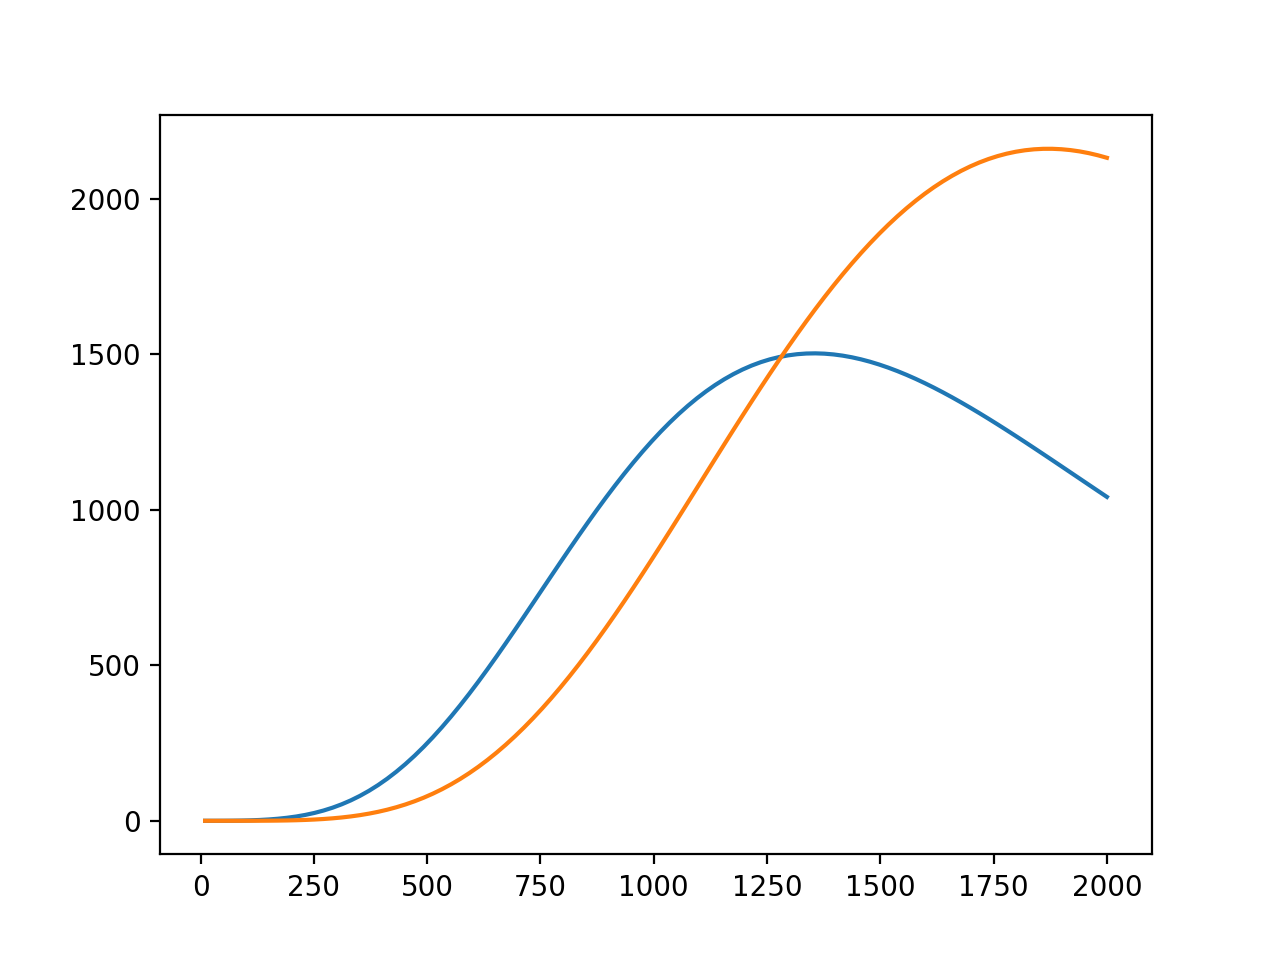

In [217]:
T1=10 ; A1=1e-13; alpha1=3.; T2=20 ; A2 = 1e-9 ; alpha2=1.2

nu=linspace(10,2000,100)
Inu=multitemp_mbb_spectra(nu,T1,alpha1,A1,T2,alpha2,A2)

figure()
plot(nu,Inu)
plot(nu,f_mbb(nu,15,3.,2.e-14,0.,0.,0.,0.,0.,0.,0.))

In [4]:
p0=(10,0,1e-10)
lb=(0., 0.,1e-14) ; ub=(50,5.,1e-8)
fitp0, fotcov=curve_fit(lambda x, T, alpha, A: f_mbb(x, T, alpha, A, p22=0., p23=0.,p33=0.,p222=0.,p223=0.,p233=0.,p333=0.), nu,Inu,p0)#,bounds=(lb,ub))
print fitp0
scale=0.5
p0=append(fitp0,0.)
lb=zeros(size(fitp0),float) ; lb[:]=fitp0[:]-scale*abs(fitp0[:]) ; lb=append(lb,-1.) #; lb=append(lb,-1.) ; lb=append(lb,-1.)
ub=zeros(size(fitp0),float) ; ub[:]=fitp0[:]+scale*abs(fitp0[:]) ; ub=append(ub,1.) #; ub=append(ub,1.) ; ub=append(ub,1.)
fitp1, fotcov=curve_fit(lambda x, T, alpha, A, p22: f_mbb(x, T, alpha, A, p22, p23=0. ,p33=0. ,p222=0.,p223=0.,p233=0.,p333=0.), nu,Inu,p0)#,bounds=(lb,ub))
print fitp1

p0=append(fitp1,0.)
lb=zeros(size(fitp1),float) ; lb[:]=fitp1[:]-scale*abs(fitp1[:]) ; lb=append(lb,-1.) #; lb=append(lb,-1.) ; lb=append(lb,-1.)
ub=zeros(size(fitp1),float) ; ub[:]=fitp1[:]+scale*abs(fitp1[:]) ; ub=append(ub,1.) #; ub=append(ub,1.) ; ub=append(ub,1.)
fitp1, fotcov=curve_fit(lambda x, T, alpha, A, p22,p23: f_mbb(x, T, alpha, A, p22, p23 ,p33=0. ,p222=0.,p223=0.,p233=0.,p333=0.), nu,Inu,p0,bounds=(lb,ub))
print fitp1

p0=append(fitp1,0.)
lb=zeros(size(fitp1),float) ; lb[:]=fitp1[:]-scale*abs(fitp1[:]) ; lb=append(lb,-1.) #; lb=append(lb,-1.) ; lb=append(lb,-1.)
ub=zeros(size(fitp1),float) ; ub[:]=fitp1[:]+scale*abs(fitp1[:]) ; ub=append(ub,1.) #; ub=append(ub,1.) ; ub=append(ub,1.)
fitp1, fotcov=curve_fit(lambda x, T, alpha, A, p22,p23,p33: f_mbb(x, T, alpha, A, p22, p23 ,p33 ,p222=0.,p223=0.,p233=0.,p333=0.), nu,Inu,p0,bounds=(lb,ub))
print fitp1


p0=append(fitp1,0.)
lb=zeros(size(fitp1),float) ; lb[:]=fitp1[:]-scale*abs(fitp1[:]) ; lb=append(lb,-1.)
ub=zeros(size(fitp1),float) ; ub[:]=fitp1[:]+scale*abs(fitp1[:]) ; ub=append(ub,1.)
fitp2, fotcov=curve_fit(lambda x, T, alpha, A, p22, p23, p33, p222: f_mbb(x, T, alpha, A, p22, p23,p33,p222,p223=0.,p233=0.,p333=0.), nu,Inu,p0,bounds=(lb,ub))
print fitp2

p0=append(fitp2,0.)
lb=zeros(size(fitp2),float) ; lb[:]=fitp2[:]-scale*abs(fitp2[:]) ; lb=append(lb,-1.)
ub=zeros(size(fitp2),float) ; ub[:]=fitp2[:]+scale*abs(fitp2[:]) ; ub=append(ub,1.)
fitp3, fotcov=curve_fit(lambda x, T, alpha, A, p22, p23, p33, p222,p223: f_mbb(x, T, alpha, A, p22, p23,p33,p222,p223,p233=0.,p333=0.), nu,Inu,p0,bounds=(lb,ub))
print fitp3

p0=append(fitp3,0.)
lb=zeros(size(fitp3),float) ; lb[:]=fitp3[:]-scale*abs(fitp3[:]) ; lb=append(lb,-1.)
ub=zeros(size(fitp3),float) ; ub[:]=fitp3[:]+scale*abs(fitp3[:]) ; ub=append(ub,1.)
fitp4, fotcov=curve_fit(lambda x, T, alpha, A, p22, p23, p33, p222,p223,p233: f_mbb(x, T, alpha, A, p22, p23,p33,p222,p223,p233,p333=0.), nu,Inu,p0,bounds=(lb,ub))
print fitp4

p0=append(fitp4,0.)
lb=zeros(size(fitp4),float) ; lb[:]=fitp4[:]-scale*abs(fitp4[:]) ; lb=append(lb,-1.)
ub=zeros(size(fitp4),float) ; ub[:]=fitp4[:]+scale*abs(fitp4[:]) ; ub=append(ub,1.)
fitp5, fotcov=curve_fit(lambda x, T, alpha, A, p22, p23, p33, p222,p223,p233,p333: f_mbb(x, T, alpha, A, p22, p23,p33,p222,p223,p233,p333), nu,Inu,p0,bounds=(lb,ub))
print fitp5

NameError: name 'curve_fit' is not defined

<IPython.core.display.Javascript object>


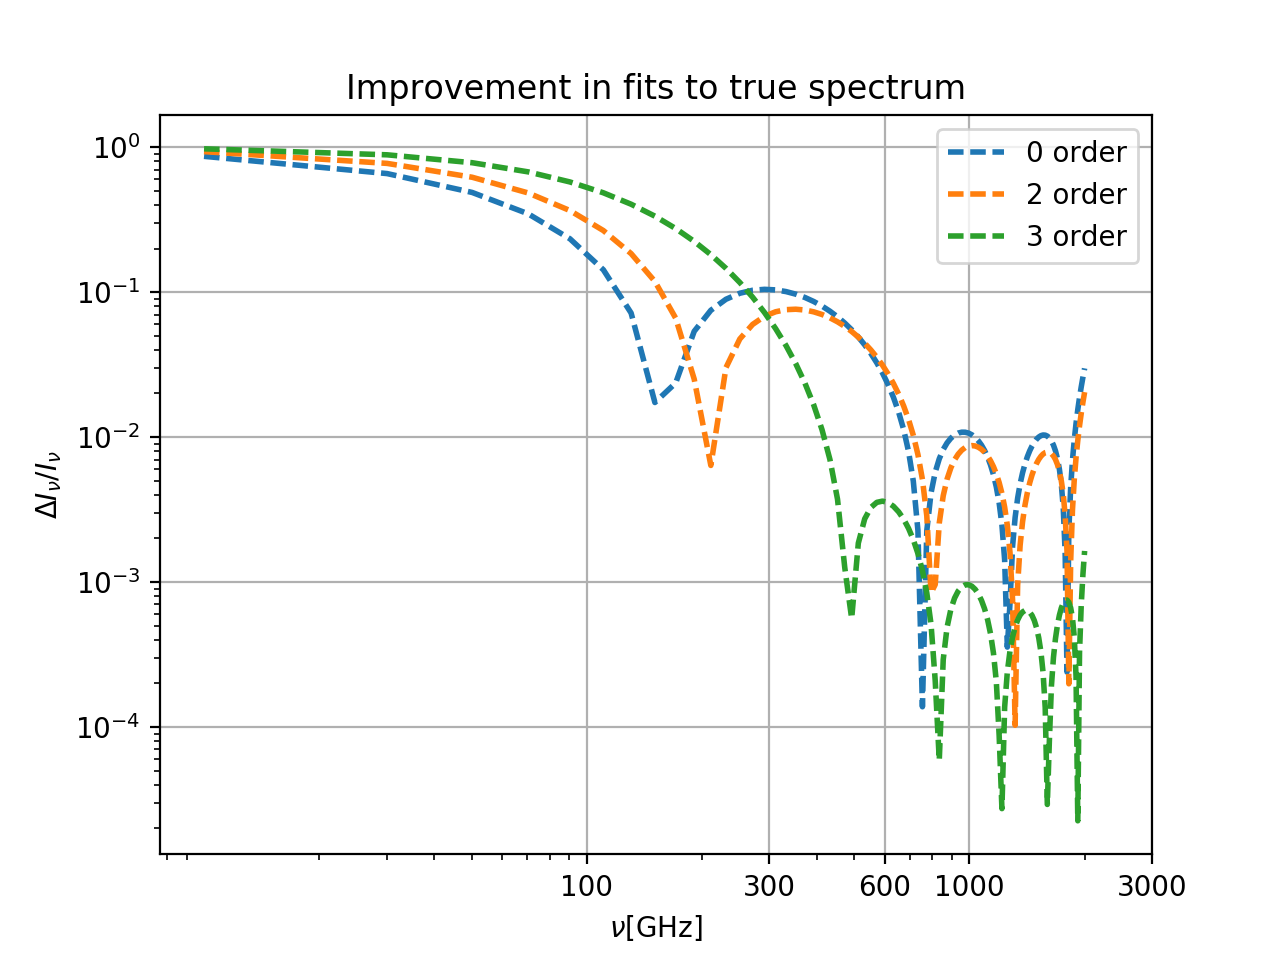

<IPython.core.display.Javascript object>


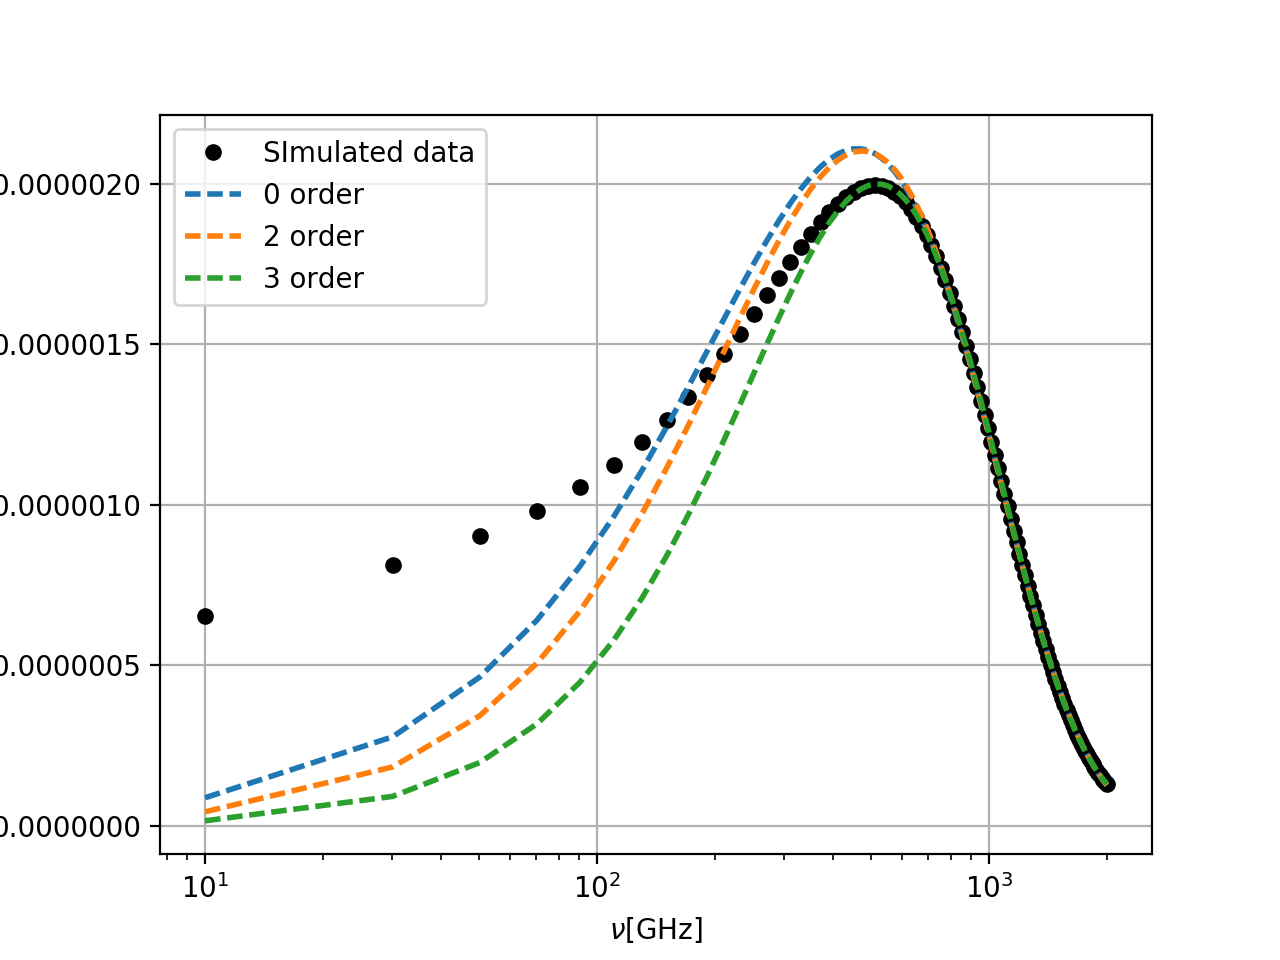

In [219]:
figure()
title("Improvement in fits to true spectrum")
pllabel="0 order"
plot(nu,abs(Inu-f_mbb(nu,T=fitp0[0],alpha=fitp0[1], A=fitp0[2],p22=0., p23=0.,p33=0.,p222=0.,p223=0.,p233=0.,p333=0.))/Inu,"--",lw=2,label=pllabel)
pllabel="2 order"
plot(nu,abs(Inu-f_mbb(nu,T=fitp1[0],alpha=fitp1[1], A=fitp1[2],p22=fitp1[3], p23=fitp1[4],p33=fitp1[5],p222=0.,p223=0.,p233=0.,p333=0.))/Inu,"--",lw=2,label=pllabel)
pllabel="3 order"
plot(nu,abs(Inu-f_mbb(nu,T=fitp5[0],alpha=fitp5[1], A=fitp5[2],p22=fitp5[3], p23=fitp5[4],p33=fitp5[5],p222=fitp5[6],p223=fitp5[7],p233=fitp5[8],p333=fitp5[9]))/Inu,"--",lw=2,label=pllabel)
loglog()
ylabel(r"$\Delta I_{\nu}/I_{\nu}$")
xlabel(r"$\nu$[GHz]")
xticks([100,300,600,1000,3000],[100,300,600,1000,3000])
grid()
legend(loc=0)
savefig("./figures/relative_error_with_taylor_order_sim_data.pdf",dpi=150,bbox_inches="tight")


figure()
sl=3.
pllabel="SImulated data"
plot(nu,Inu/(nu**sl),"ko",mec="none",lw=4,alpha=1.,label=pllabel)
pllabel="0 order"
plot(nu,f_mbb(nu,T=fitp0[0],alpha=fitp0[1], A=fitp0[2],p22=0., p23=0.,p33=0.,p222=0.,p223=0.,p233=0.,p333=0.)/(nu**sl),"--",lw=2,label=pllabel)
pllabel="2 order"
plot(nu,f_mbb(nu,T=fitp1[0],alpha=fitp1[1], A=fitp1[2],p22=fitp1[3], p23=fitp1[4],p33=fitp1[5],p222=0.,p223=0.,p233=0.,p333=0.)/(nu**sl),"--",lw=2,label=pllabel)
pllabel="3 order"
plot(nu,f_mbb(nu,T=fitp5[0],alpha=fitp5[1], A=fitp5[2],p22=fitp5[3], p23=fitp5[4],p33=fitp5[5],p222=fitp5[6],p223=fitp5[7],p233=fitp5[8],p333=fitp5[9])/(nu**sl),"--",lw=2,label=pllabel)
legend(loc=0)
ylabel(r"$I_{\nu}/ \nu^{3}$")
xlabel(r"$\nu$[GHz]")
grid()
legend(loc=0)
xticks([10,100,300,600,1000,3000],[10,100,300,600,1000,3000])
semilogx()
savefig("./figures/inu_fit_with_taylor_order_sim_data.pdf",dpi=150,bbox_inches="tight")

<IPython.core.display.Javascript object>


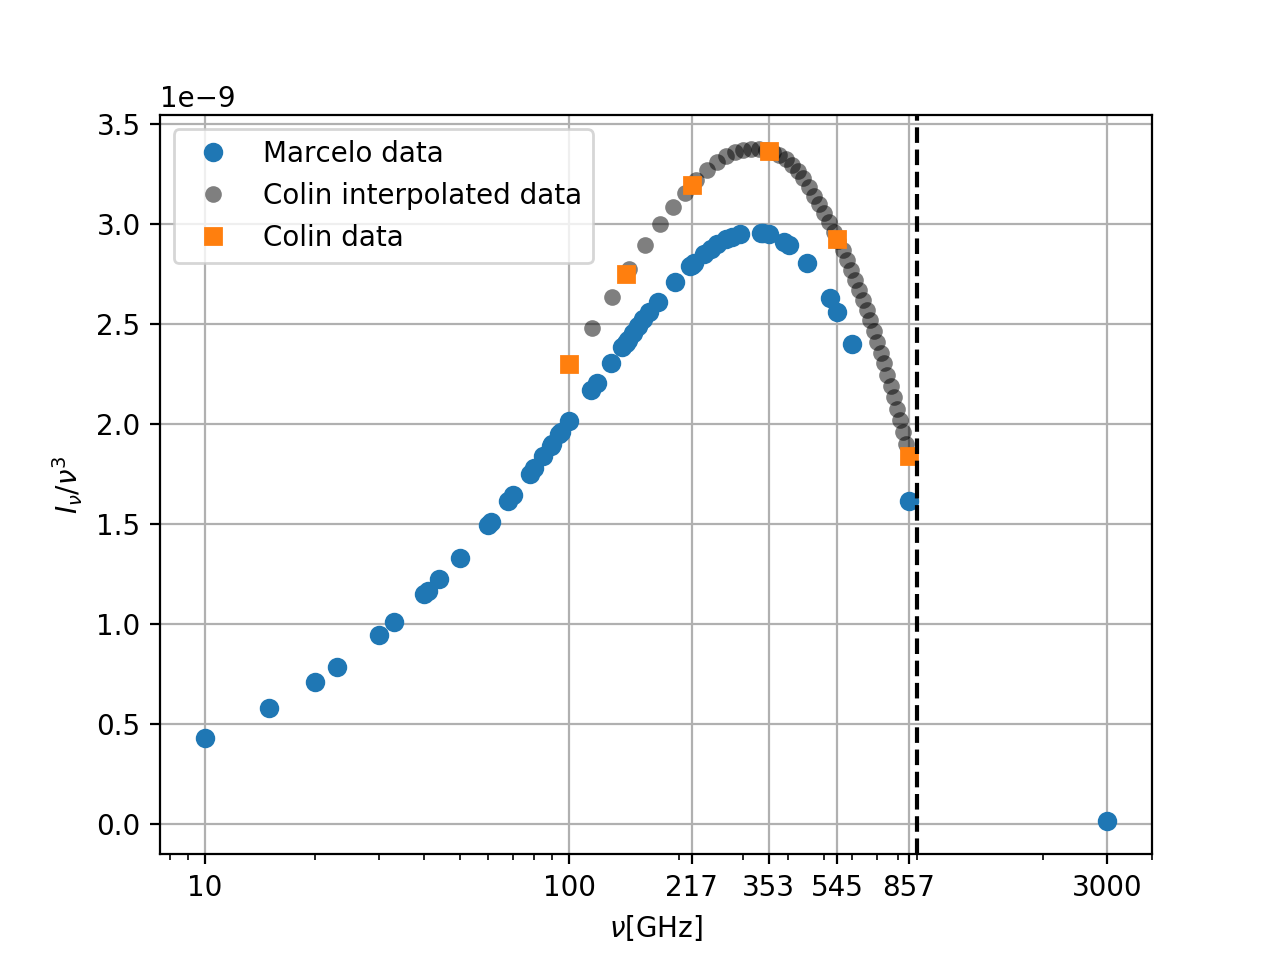

([<matplotlib.axis.XTick at 0x1a40277d0>,
 <a list of 7 Text xticklabel objects>)

In [220]:
dc=loadtxt("./data/colin_data.txt")
dm=loadtxt("./data/marcelo_data.txt")
nu=dc[:,0]
Inu=dc[:,1]

#sigma=zeros(size(nu),float)
nu=linspace(min(dc[:,0]),max(dc[:,0]),50)
fn=interp1d(dc[:,0],dc[:,1]/(dc[:,0]**3.),kind="quadratic")
#Inu=log(fn(nu))
Inu=fn(nu)*(nu**3.)


figure()
plot(dm[:,0],dm[:,1]/(dm[:,0]**3),"o",label="Marcelo data")
plot(nu,Inu/(nu**3.),"ko",mec="none",alpha=0.5,label="Colin interpolated data")
plot(dc[:,0],dc[:,1]/(dc[:,0]**3),"s",label="Colin data")
ylabel(r"$I_{\nu}/ \nu^{3}$")
xlabel(r"$\nu$[GHz]")
axvline(900,color="black",linestyle="dashed")
semilogx()
legend(loc=0)
grid()
xticks([10,100,217,353,545,857,3000],[10,100,217,353,545,857,3000])
#savefig("./figures/intensity_spectrum_data.pdf",dpi=150,bbox_inches="tight",alpha=0.3)

# Analysis on Colin's interpolated data

In [221]:
p0=(10,0,1e-10)
lb=(0., 0.,1e-14) ; ub=(100,3.,1e-8)
fitp0, fotcov=curve_fit(lambda x, T, alpha, A: f_mbb(x, T, alpha, A, p22=0., p23=0.,p33=0.,p222=0.,p223=0.,p233=0.,p333=0.), nu,Inu,p0,bounds=(lb,ub))
print fitp0

p0=append(fitp0,0.) ; p0=append(p0,0.) ; p0=append(p0,0.)
lb=zeros(size(fitp0),float) ; lb[:]=fitp0[:]-0.5*abs(fitp0[:]) ; lb=append(lb,-1.) ; lb=append(lb,-1.) ; lb=append(lb,-1.)
ub=zeros(size(fitp0),float) ; ub[:]=fitp0[:]+0.5*abs(fitp0[:]) ; ub=append(ub,1.) ; ub=append(ub,1.) ; ub=append(ub,1.)
fitp1, fotcov=curve_fit(lambda x, T, alpha, A, p22, p23, p33: f_mbb(x, T, alpha, A, p22, p23,p33,p222=0.,p223=0.,p233=0.,p333=0.), nu,Inu,p0,bounds=(lb,ub))
print fitp1


p0=append(fitp1,0.)
lb=zeros(size(fitp1),float) ; lb[:]=fitp1[:]-0.5*abs(fitp1[:]) ; lb=append(lb,-1.)
ub=zeros(size(fitp1),float) ; ub[:]=fitp1[:]+0.5*abs(fitp1[:]) ; ub=append(ub,1.)
fitp2, fotcov=curve_fit(lambda x, T, alpha, A, p22, p23, p33, p222: f_mbb(x, T, alpha, A, p22, p23,p33,p222,p223=0.,p233=0.,p333=0.), nu,Inu,p0,bounds=(lb,ub))
print fitp2

p0=append(fitp2,0.)
lb=zeros(size(fitp2),float) ; lb[:]=fitp2[:]-0.5*abs(fitp2[:]) ; lb=append(lb,-1.)
ub=zeros(size(fitp2),float) ; ub[:]=fitp2[:]+0.5*abs(fitp2[:]) ; ub=append(ub,1.)
fitp3, fotcov=curve_fit(lambda x, T, alpha, A, p22, p23, p33, p222,p223: f_mbb(x, T, alpha, A, p22, p23,p33,p222,p223,p233=0.,p333=0.), nu,Inu,p0,bounds=(lb,ub))
print fitp3

p0=append(fitp3,0.)
lb=zeros(size(fitp3),float) ; lb[:]=fitp3[:]-0.5*abs(fitp3[:]) ; lb=append(lb,-1.)
ub=zeros(size(fitp3),float) ; ub[:]=fitp3[:]+0.5*abs(fitp3[:]) ; ub=append(ub,1.)
fitp4, fotcov=curve_fit(lambda x, T, alpha, A, p22, p23, p33, p222,p223,p233: f_mbb(x, T, alpha, A, p22, p23,p33,p222,p223,p233,p333=0.), nu,Inu,p0,bounds=(lb,ub))
print fitp4

p0=append(fitp4,0.)
lb=zeros(size(fitp4),float) ; lb[:]=fitp4[:]-0.5*abs(fitp4[:]) ; lb=append(lb,-1.)
ub=zeros(size(fitp4),float) ; ub[:]=fitp4[:]+0.5*abs(fitp4[:]) ; ub=append(ub,1.)
fitp5, fotcov=curve_fit(lambda x, T, alpha, A, p22, p23, p33, p222,p223,p233,p333: f_mbb(x, T, alpha, A, p22, p23,p33,p222,p223,p233,p333), nu,Inu,p0,bounds=(lb,ub))
print fitp5

[  1.28608569e+01   1.76799398e+00   2.84485514e-13]
[  1.92912802e+01   1.99024173e+00   1.42242821e-13  -5.73964296e-02
   6.16504271e-02  -1.70559210e-01]
[  1.93714520e+01   2.13164156e+00   7.11214571e-14  -6.03679722e-02
   6.70895732e-02  -1.73048054e-01  -8.93931601e-04]
[  1.86804002e+01   2.29008864e+00   3.55607444e-14  -6.17650972e-02
   5.23559859e-02  -1.69359027e-01  -1.22957174e-03   4.47440441e-03]
[  1.54658283e+01   2.39264231e+00   2.64387632e-14  -6.10600463e-02
   2.92611958e-02  -8.46795156e-02  -7.11923293e-04   6.71160624e-03
  -3.87365228e-03]
[  1.47998975e+01   2.38483536e+00   2.87229735e-14  -5.78967189e-02
   1.46305995e-02  -5.63096060e-02  -7.70559096e-04   8.34759790e-03
  -2.19029753e-03  -1.24197417e-02]


In [222]:
p0=(10,0,1e-10)
lb=(0., 0.,1e-14) ; ub=(100,3.,1e-8)
fitp0, fotcov=curve_fit(lambda x, T, alpha, A: f_mbb(x, T, alpha, A, p22=0., p23=0.,p33=0.,p222=0.,p223=0.,p233=0.,p333=0.), nu,Inu,p0,bounds=(lb,ub))
print fitp0
scale=0.85
p0=append(fitp0,0.)
lb=zeros(size(fitp0),float) ; lb[:]=fitp0[:]-scale*abs(fitp0[:]) ; lb=append(lb,-1.) #; lb=append(lb,-1.) ; lb=append(lb,-1.)
ub=zeros(size(fitp0),float) ; ub[:]=fitp0[:]+scale*abs(fitp0[:]) ; ub=append(ub,1.) #; ub=append(ub,1.) ; ub=append(ub,1.)
fitp1, fotcov=curve_fit(lambda x, T, alpha, A, p22: f_mbb(x, T, alpha, A, p22, p23=0. ,p33=0. ,p222=0.,p223=0.,p233=0.,p333=0.), nu,Inu,p0,bounds=(lb,ub))
print fitp1

p0=append(fitp1,0.)
lb=zeros(size(fitp1),float) ; lb[:]=fitp1[:]-scale*abs(fitp1[:]) ; lb=append(lb,-1.) #; lb=append(lb,-1.) ; lb=append(lb,-1.)
ub=zeros(size(fitp1),float) ; ub[:]=fitp1[:]+scale*abs(fitp1[:]) ; ub=append(ub,1.) #; ub=append(ub,1.) ; ub=append(ub,1.)
fitp1, fotcov=curve_fit(lambda x, T, alpha, A, p22,p23: f_mbb(x, T, alpha, A, p22, p23 ,p33=0. ,p222=0.,p223=0.,p233=0.,p333=0.), nu,Inu,p0,bounds=(lb,ub))
print fitp1

p0=append(fitp1,0.)
lb=zeros(size(fitp1),float) ; lb[:]=fitp1[:]-scale*abs(fitp1[:]) ; lb=append(lb,-1.) #; lb=append(lb,-1.) ; lb=append(lb,-1.)
ub=zeros(size(fitp1),float) ; ub[:]=fitp1[:]+scale*abs(fitp1[:]) ; ub=append(ub,1.) #; ub=append(ub,1.) ; ub=append(ub,1.)
fitp1, fotcov=curve_fit(lambda x, T, alpha, A, p22,p23,p33: f_mbb(x, T, alpha, A, p22, p23 ,p33 ,p222=0.,p223=0.,p233=0.,p333=0.), nu,Inu,p0,bounds=(lb,ub))
print fitp1


p0=append(fitp1,0.)
lb=zeros(size(fitp1),float) ; lb[:]=fitp1[:]-scale*abs(fitp1[:]) ; lb=append(lb,-1.)
ub=zeros(size(fitp1),float) ; ub[:]=fitp1[:]+scale*abs(fitp1[:]) ; ub=append(ub,1.)
fitp2, fotcov=curve_fit(lambda x, T, alpha, A, p22, p23, p33, p222: f_mbb(x, T, alpha, A, p22, p23,p33,p222,p223=0.,p233=0.,p333=0.), nu,Inu,p0,bounds=(lb,ub))
print fitp2

p0=append(fitp2,0.)
lb=zeros(size(fitp2),float) ; lb[:]=fitp2[:]-scale*abs(fitp2[:]) ; lb=append(lb,-1.)
ub=zeros(size(fitp2),float) ; ub[:]=fitp2[:]+scale*abs(fitp2[:]) ; ub=append(ub,1.)
fitp3, fotcov=curve_fit(lambda x, T, alpha, A, p22, p23, p33, p222,p223: f_mbb(x, T, alpha, A, p22, p23,p33,p222,p223,p233=0.,p333=0.), nu,Inu,p0,bounds=(lb,ub))
print fitp3

p0=append(fitp3,0.)
lb=zeros(size(fitp3),float) ; lb[:]=fitp3[:]-scale*abs(fitp3[:]) ; lb=append(lb,-1.)
ub=zeros(size(fitp3),float) ; ub[:]=fitp3[:]+scale*abs(fitp3[:]) ; ub=append(ub,1.)
fitp4, fotcov=curve_fit(lambda x, T, alpha, A, p22, p23, p33, p222,p223,p233: f_mbb(x, T, alpha, A, p22, p23,p33,p222,p223,p233,p333=0.), nu,Inu,p0,bounds=(lb,ub))
print fitp4

p0=append(fitp4,0.)
lb=zeros(size(fitp4),float) ; lb[:]=fitp4[:]-scale*abs(fitp4[:]) ; lb=append(lb,-1.)
ub=zeros(size(fitp4),float) ; ub[:]=fitp4[:]+scale*abs(fitp4[:]) ; ub=append(ub,1.)
fitp5, fotcov=curve_fit(lambda x, T, alpha, A, p22, p23, p33, p222,p223,p233,p333: f_mbb(x, T, alpha, A, p22, p23,p33,p222,p223,p233,p333), nu,Inu,p0,bounds=(lb,ub))
print fitp5

[  1.28608569e+01   1.76799398e+00   2.84485514e-13]
[  1.28264245e+01   1.67885998e+00   3.53722408e-13   2.11140566e-02]
[  2.37288148e+01   1.54767903e+00   5.81078369e-13   3.16796275e-03
  -4.52896176e-02]
[  3.10941763e+01   1.42072122e+00   9.94094035e-13   4.75196381e-04
  -2.63086074e-02  -1.66329352e-01]
[  5.75242261e+01   1.57162165e+00   2.53215591e-13   8.79113294e-04
  -3.94629111e-03  -8.17987121e-02  -1.31769590e-02]
[  6.56676220e+01   1.57995983e+00   2.24870680e-13   7.67653912e-04
  -3.41130058e-03  -1.51321018e-01  -1.51747981e-02   5.49720724e-03]
[  4.31661716e+01   1.58281216e+00   3.52426487e-13   1.15153070e-04
  -5.12927284e-04  -1.75283665e-01  -1.37124030e-02   1.01695738e-02
  -1.51811673e-02]
[  2.57921160e+01   1.71812665e+00   3.12772185e-13   1.73390738e-05
  -1.38225552e-04  -9.64617292e-02  -1.96477813e-02   1.88136909e-02
  -6.34784545e-03  -1.21785790e-01]


<IPython.core.display.Javascript object>


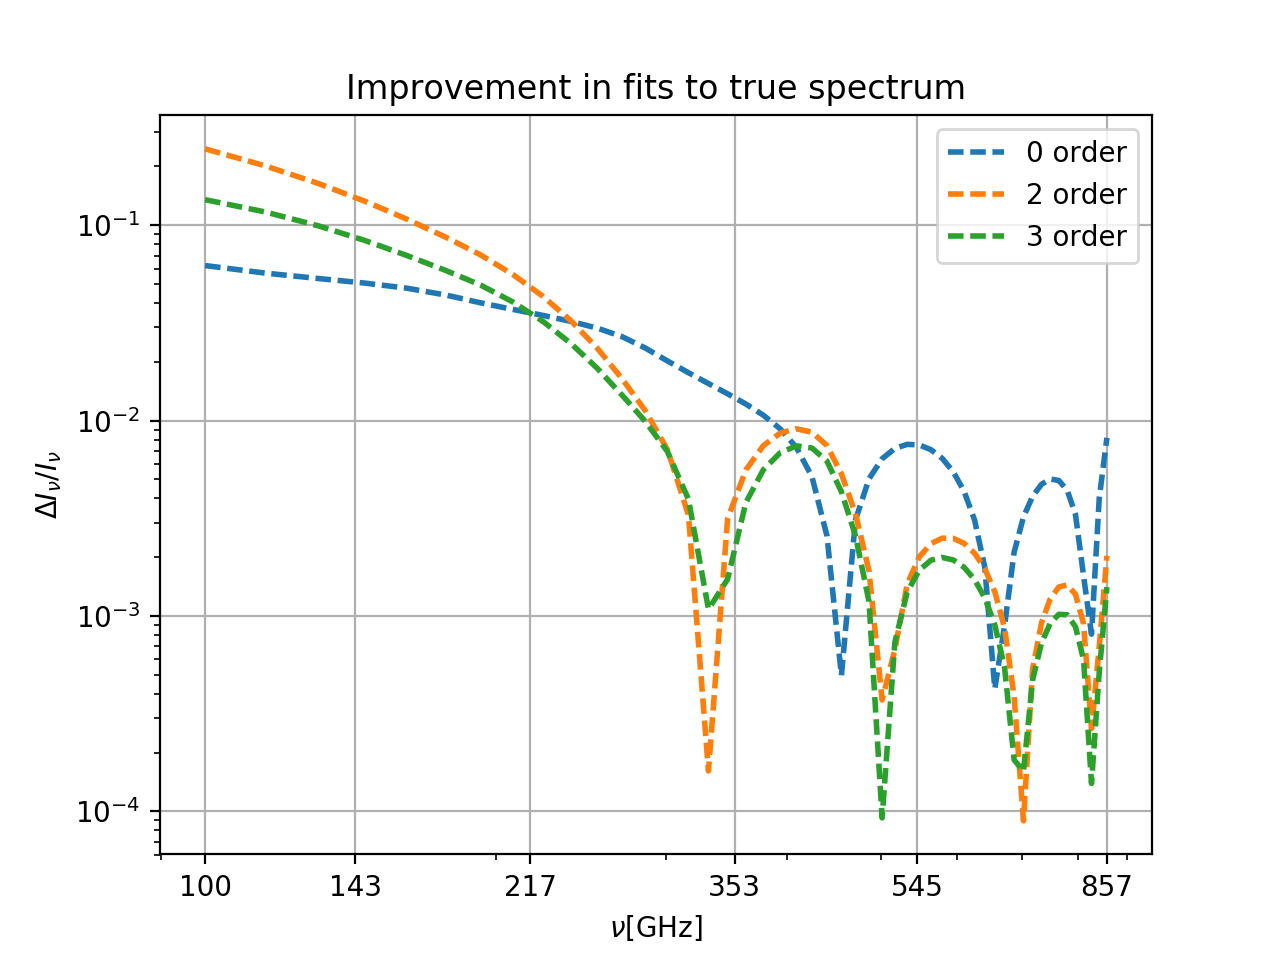

<IPython.core.display.Javascript object>


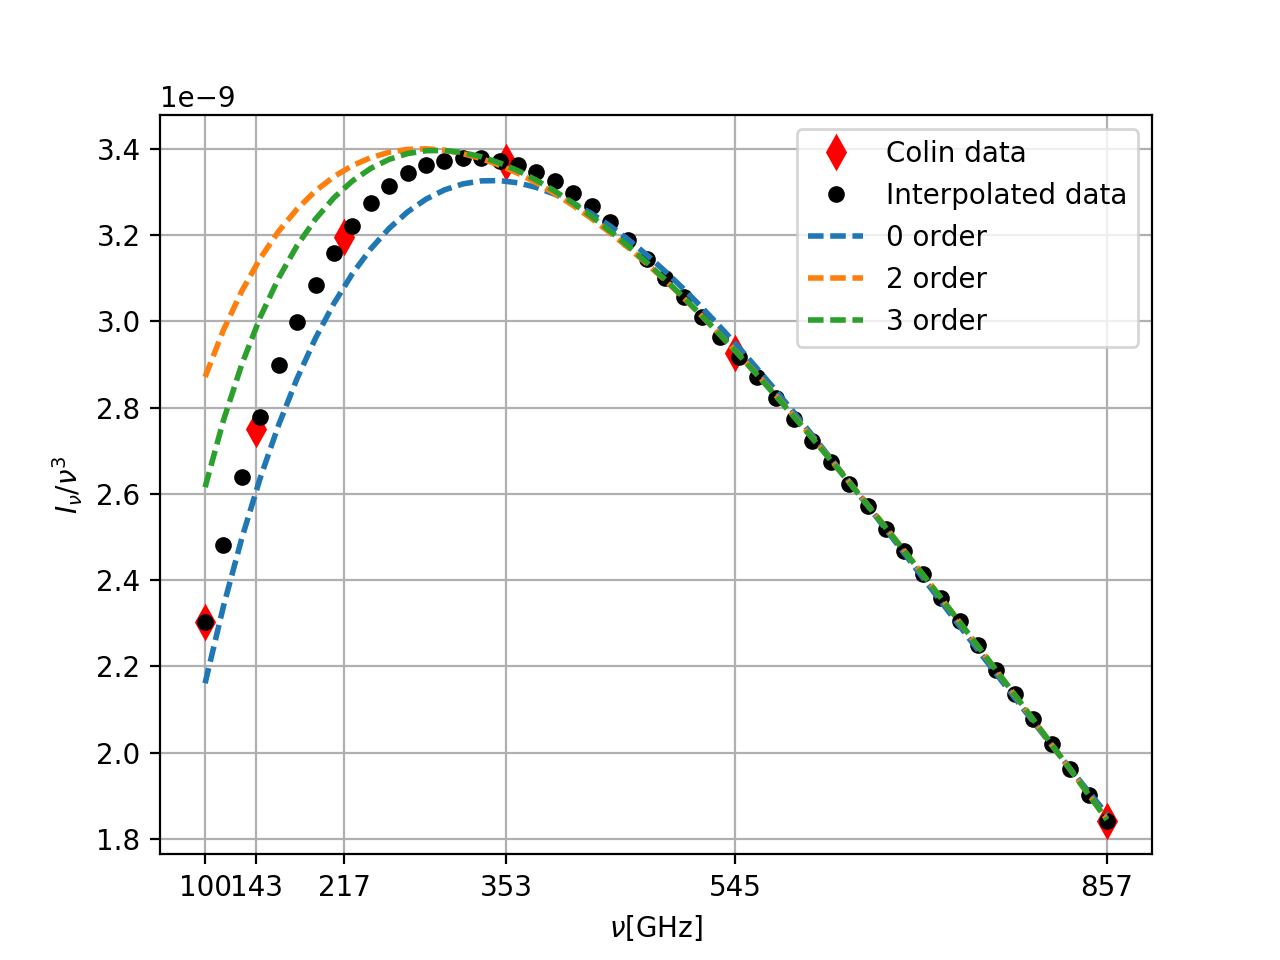

In [223]:
figure()
title("Improvement in fits to true spectrum")
pllabel="0 order"
plot(nu,abs(Inu-f_mbb(nu,T=fitp0[0],alpha=fitp0[1], A=fitp0[2],p22=0., p23=0.,p33=0.,p222=0.,p223=0.,p233=0.,p333=0.))/Inu,"--",lw=2,label=pllabel)
pllabel="2 order"
plot(nu,abs(Inu-f_mbb(nu,T=fitp1[0],alpha=fitp1[1], A=fitp1[2],p22=fitp1[3], p23=fitp1[4],p33=fitp1[5],p222=0.,p223=0.,p233=0.,p333=0.))/Inu,"--",lw=2,label=pllabel)
pllabel="3 order"
plot(nu,abs(Inu-f_mbb(nu,T=fitp5[0],alpha=fitp5[1], A=fitp5[2],p22=fitp5[3], p23=fitp5[4],p33=fitp5[5],p222=fitp5[6],p223=fitp5[7],p233=fitp5[8],p333=fitp5[9]))/Inu,"--",lw=2,label=pllabel)
loglog()
ylabel(r"$\Delta I_{\nu}/I_{\nu}$")
xlabel(r"$\nu$[GHz]")
xticks([100,143,217,353,545,857],[100,143,217,353,545,857])
grid()
legend(loc=0)
savefig("./figures/relative_error_with_taylor_order_colin_data.pdf",dpi=150,bbox_inches="tight")


figure()
sl=3.
title("")
plot(dc[:,0],dc[:,1]/(dc[:,0]**sl),"rd",ms=8,label="Colin data")
pllabel="Interpolated data"
plot(nu,Inu/(nu**sl),"ko",mec="none",lw=4,alpha=1.,label=pllabel)
pllabel="0 order"
plot(nu,f_mbb(nu,T=fitp0[0],alpha=fitp0[1], A=fitp0[2],p22=0., p23=0.,p33=0.,p222=0.,p223=0.,p233=0.,p333=0.)/(nu**sl),"--",lw=2,label=pllabel)
pllabel="2 order"
plot(nu,f_mbb(nu,T=fitp1[0],alpha=fitp1[1], A=fitp1[2],p22=fitp1[3], p23=fitp1[4],p33=fitp1[5],p222=0.,p223=0.,p233=0.,p333=0.)/(nu**sl),"--",lw=2,label=pllabel)
pllabel="3 order"
plot(nu,f_mbb(nu,T=fitp5[0],alpha=fitp5[1], A=fitp5[2],p22=fitp5[3], p23=fitp5[4],p33=fitp5[5],p222=fitp5[6],p223=fitp5[7],p233=fitp5[8],p333=fitp5[9])/(nu**sl),"--",lw=2,label=pllabel)
legend(loc=0)
ylabel(r"$I_{\nu}/ \nu^{3}$")
xlabel(r"$\nu$[GHz]")
grid()
legend(loc=0)
xticks([100,143,217,353,545,857],[100,143,217,353,545,857])
savefig("./figures/inu_fit_with_taylor_order_colin_data.pdf",dpi=150,bbox_inches="tight")

# Analysis on Marcelo data

In [224]:
nu=dm[:,0]#[dm[:,0]>=100.]#[dm[:,0]<1000.]
Inu=dm[:,1]#[dm[:,0]>=100.]

In [5]:
p0=(10,0,1e-10)
lb=(0., 0.,1e-14) ; ub=(100,3.,1e-8)
fitp0, fotcov=curve_fit(lambda x, T, alpha, A: f_mbb(x, T, alpha, A, p22=0., p23=0.,p33=0.,p222=0.,p223=0.,p233=0.,p333=0.), nu,Inu,p0,bounds=(lb,ub))
print fitp0
scale=0.5
p0=append(fitp0,0.)
lb=zeros(size(fitp0),float) ; lb[:]=fitp0[:]-scale*abs(fitp0[:]) ; lb=append(lb,-1.) #; lb=append(lb,-1.) ; lb=append(lb,-1.)
ub=zeros(size(fitp0),float) ; ub[:]=fitp0[:]+scale*abs(fitp0[:]) ; ub=append(ub,1.) #; ub=append(ub,1.) ; ub=append(ub,1.)
fitp1, fotcov=curve_fit(lambda x, T, alpha, A, p22: f_mbb(x, T, alpha, A, p22, p23=0. ,p33=0. ,p222=0.,p223=0.,p233=0.,p333=0.), nu,Inu,p0,bounds=(lb,ub))
print fitp1

p0=append(fitp1,0.)
lb=zeros(size(fitp1),float) ; lb[:]=fitp1[:]-scale*abs(fitp1[:]) ; lb=append(lb,-1.) #; lb=append(lb,-1.) ; lb=append(lb,-1.)
ub=zeros(size(fitp1),float) ; ub[:]=fitp1[:]+scale*abs(fitp1[:]) ; ub=append(ub,1.) #; ub=append(ub,1.) ; ub=append(ub,1.)
fitp1, fotcov=curve_fit(lambda x, T, alpha, A, p22,p23: f_mbb(x, T, alpha, A, p22, p23 ,p33=0. ,p222=0.,p223=0.,p233=0.,p333=0.), nu,Inu,p0,bounds=(lb,ub))
print fitp1

p0=append(fitp1,0.)
lb=zeros(size(fitp1),float) ; lb[:]=fitp1[:]-scale*abs(fitp1[:]) ; lb=append(lb,-1.) #; lb=append(lb,-1.) ; lb=append(lb,-1.)
ub=zeros(size(fitp1),float) ; ub[:]=fitp1[:]+scale*abs(fitp1[:]) ; ub=append(ub,1.) #; ub=append(ub,1.) ; ub=append(ub,1.)
fitp1, fotcov=curve_fit(lambda x, T, alpha, A, p22,p23,p33: f_mbb(x, T, alpha, A, p22, p23 ,p33 ,p222=0.,p223=0.,p233=0.,p333=0.), nu,Inu,p0,bounds=(lb,ub))
print fitp1


p0=append(fitp1,0.)
lb=zeros(size(fitp1),float) ; lb[:]=fitp1[:]-scale*abs(fitp1[:]) ; lb=append(lb,-1.)
ub=zeros(size(fitp1),float) ; ub[:]=fitp1[:]+scale*abs(fitp1[:]) ; ub=append(ub,1.)
fitp2, fotcov=curve_fit(lambda x, T, alpha, A, p22, p23, p33, p222: f_mbb(x, T, alpha, A, p22, p23,p33,p222,p223=0.,p233=0.,p333=0.), nu,Inu,p0,bounds=(lb,ub))
print fitp2

p0=append(fitp2,0.)
lb=zeros(size(fitp2),float) ; lb[:]=fitp2[:]-scale*abs(fitp2[:]) ; lb=append(lb,-1.)
ub=zeros(size(fitp2),float) ; ub[:]=fitp2[:]+scale*abs(fitp2[:]) ; ub=append(ub,1.)
fitp3, fotcov=curve_fit(lambda x, T, alpha, A, p22, p23, p33, p222,p223: f_mbb(x, T, alpha, A, p22, p23,p33,p222,p223,p233=0.,p333=0.), nu,Inu,p0,bounds=(lb,ub))
print fitp3

p0=append(fitp3,0.)
lb=zeros(size(fitp3),float) ; lb[:]=fitp3[:]-scale*abs(fitp3[:]) ; lb=append(lb,-1.)
ub=zeros(size(fitp3),float) ; ub[:]=fitp3[:]+scale*abs(fitp3[:]) ; ub=append(ub,1.)
fitp4, fotcov=curve_fit(lambda x, T, alpha, A, p22, p23, p33, p222,p223,p233: f_mbb(x, T, alpha, A, p22, p23,p33,p222,p223,p233,p333=0.), nu,Inu,p0,bounds=(lb,ub))
print fitp4

p0=append(fitp4,0.)
lb=zeros(size(fitp4),float) ; lb[:]=fitp4[:]-scale*abs(fitp4[:]) ; lb=append(lb,-1.)
ub=zeros(size(fitp4),float) ; ub[:]=fitp4[:]+scale*abs(fitp4[:]) ; ub=append(ub,1.)
fitp5, fotcov=curve_fit(f_mbb,nu,Inu,p0,bounds=(lb,ub))
print fitp5

NameError: name 'curve_fit' is not defined

<IPython.core.display.Javascript object>


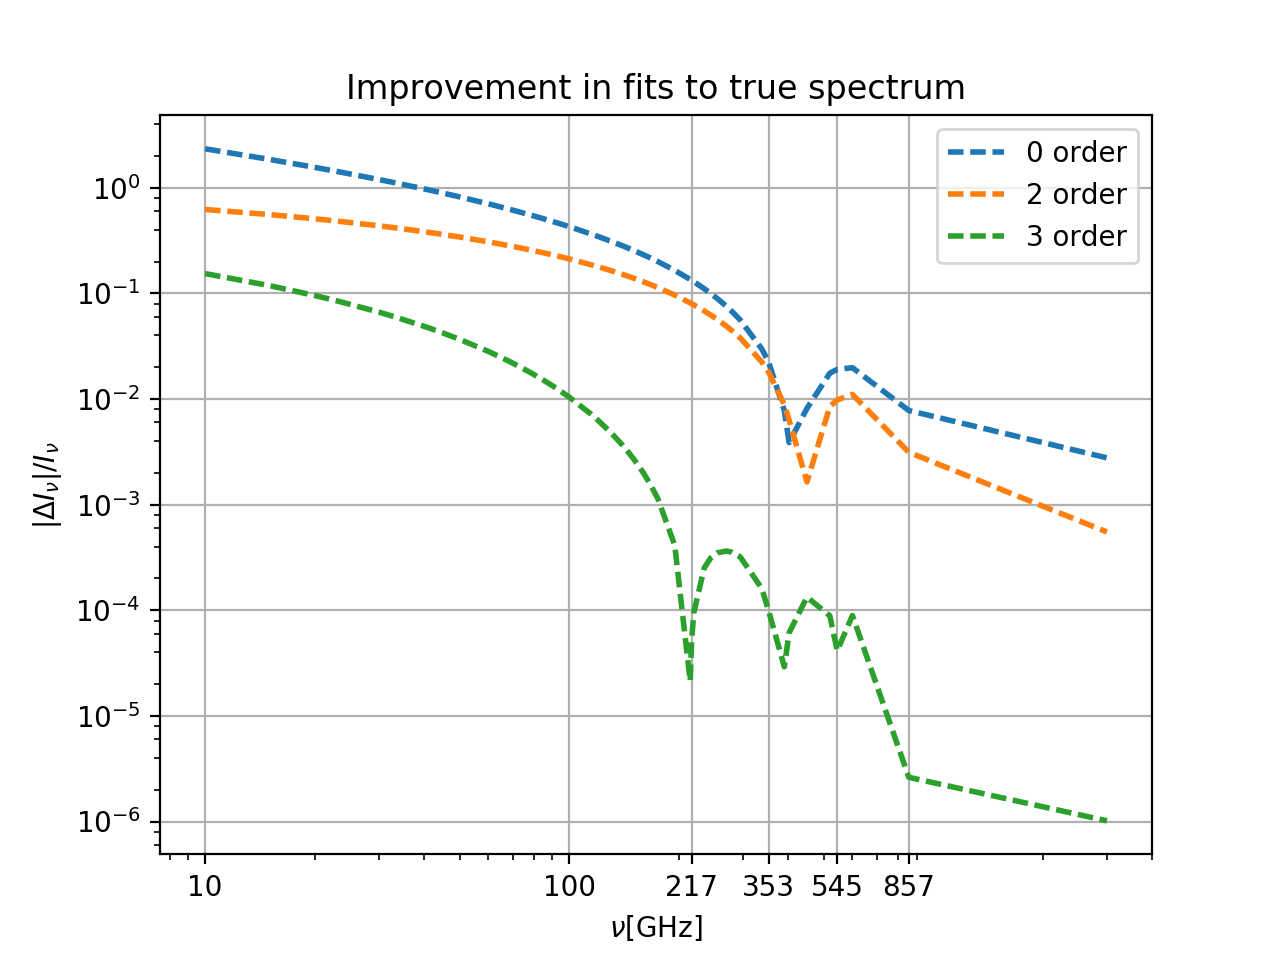

<IPython.core.display.Javascript object>


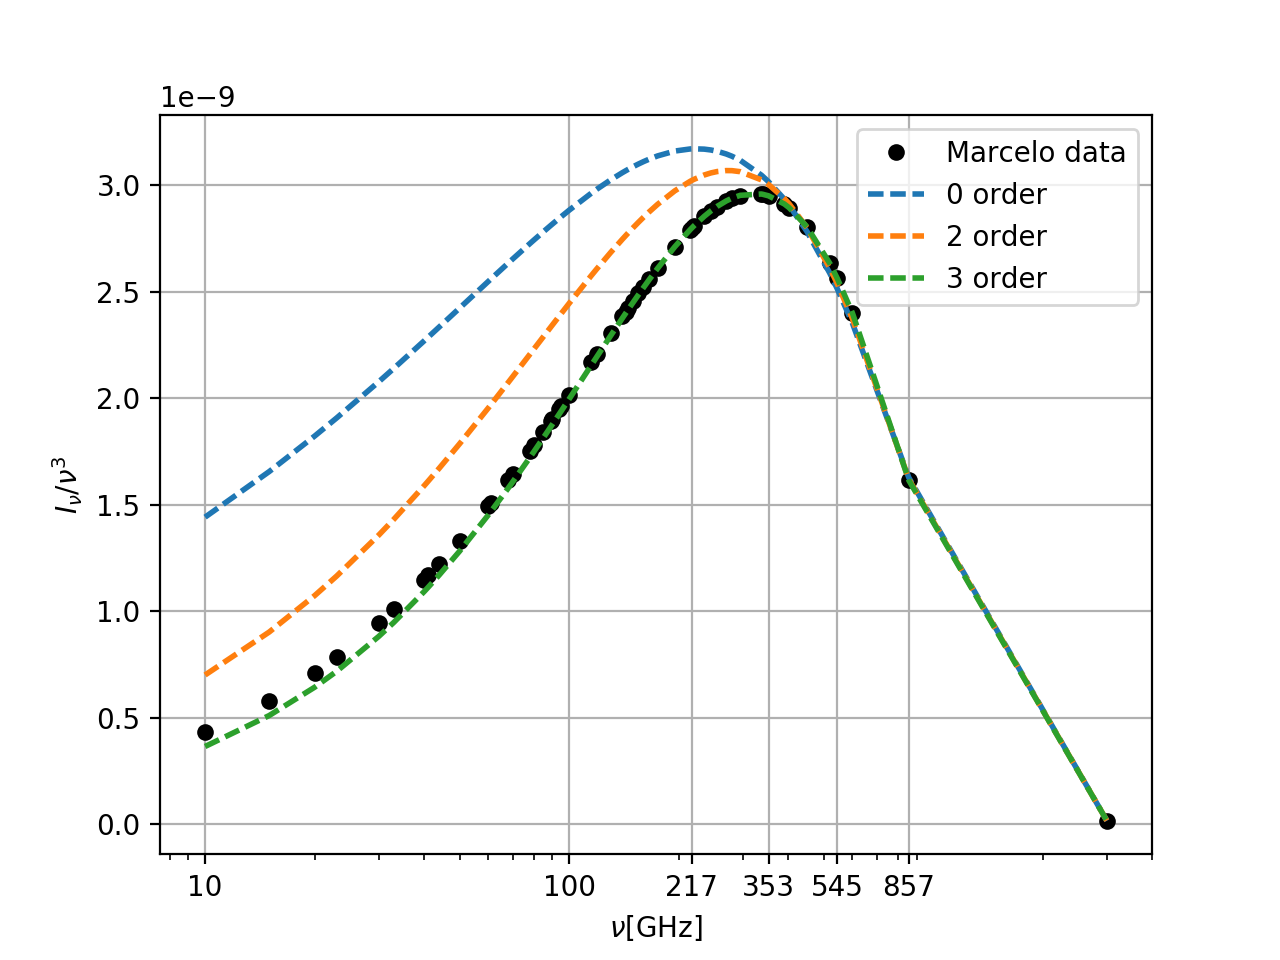

In [226]:
figure()
title("Improvement in fits to true spectrum")
pllabel="0 order"
plot(nu,abs(Inu-f_mbb(nu,T=fitp0[0],alpha=fitp0[1], A=fitp0[2],p22=0., p23=0.,p33=0.,p222=0.,p223=0.,p233=0.,p333=0.))/Inu,"--",lw=2,label=pllabel)
pllabel="2 order"
plot(nu,abs(Inu-f_mbb(nu,T=fitp1[0],alpha=fitp1[1], A=fitp1[2],p22=fitp1[3], p23=fitp1[4],p33=fitp1[5],p222=0.,p223=0.,p233=0.,p333=0.))/Inu,"--",lw=2,label=pllabel)
pllabel="3 order"
plot(nu,abs(Inu-f_mbb(nu,T=fitp5[0],alpha=fitp5[1], A=fitp5[2],p22=fitp5[3], p23=fitp5[4],p33=fitp5[5],p222=fitp5[6],p223=fitp5[7],p233=fitp5[8],p333=fitp5[9]))/Inu,"--",lw=2,label=pllabel)
loglog()
ylabel(r"$|\Delta I_{\nu}|/I_{\nu}$")
xlabel(r"$\nu$[GHz]")
xticks([10,100,217,353,545,857],[10,100,217,353,545,857])
grid()
legend(loc=0)
savefig("./figures/relative_error_with_taylor_order_marcelo_data.pdf",dpi=150,bbox_inches="tight")



figure()
sl=3.
title("")
plot(nu,Inu/(nu**sl),"ko",mec="none",label="Marcelo data")
pllabel="0 order"
plot(nu,f_mbb(nu,T=fitp0[0],alpha=fitp0[1], A=fitp0[2],p22=0., p23=0.,p33=0.,p222=0.,p223=0.,p233=0.,p333=0.)/(nu**sl),"--",lw=2,label=pllabel)
pllabel="2 order"
plot(nu,f_mbb(nu,T=fitp1[0],alpha=fitp1[1], A=fitp1[2],p22=fitp1[3], p23=fitp1[4],p33=fitp1[5],p222=0.,p223=0.,p233=0.,p333=0.)/(nu**sl),"--",lw=2,label=pllabel)
pllabel="3 order"
plot(nu,f_mbb(nu,T=fitp5[0],alpha=fitp5[1], A=fitp5[2],p22=fitp5[3], p23=fitp5[4],p33=fitp5[5],p222=fitp5[6],p223=fitp5[7],p233=fitp5[8],p333=fitp5[9])/(nu**sl),"--",lw=2,label=pllabel)
legend(loc=0)
ylabel(r"$I_{\nu}/ \nu^{3}$")
xlabel(r"$\nu$[GHz]")
grid()
semilogx()
legend(loc=0)
xticks([10,100,217,353,545,857],[10,100,217,353,545,857])
savefig("./figures/inu_fit_with_taylor_order_marcelo_data.pdf",dpi=150,bbox_inches="tight")

In [2]:
fotcov

NameError: name 'fotcov' is not defined